# Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


Importing dataset into a dataframe

In [1]:
dfc = pd.read_csv(r'D:\Users\sathi\Downloads\NUSW-NB15_features.csv',encoding='cp1252')
headers = dfc.Name
df = pd.read_csv(r'D:\Users\sathi\Downloads\UNSW-NB15_1.csv', names=headers)
df

NameError: name 'pd' is not defined

# Exploratory Data Analysis(EDA)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700001 entries, 0 to 700000
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             700001 non-null  object 
 1   sport             700001 non-null  object 
 2   dstip             700001 non-null  object 
 3   dsport            700001 non-null  object 
 4   proto             700001 non-null  object 
 5   state             700001 non-null  object 
 6   dur               700001 non-null  float64
 7   sbytes            700001 non-null  int64  
 8   dbytes            700001 non-null  int64  
 9   sttl              700001 non-null  int64  
 10  dttl              700001 non-null  int64  
 11  sloss             700001 non-null  int64  
 12  dloss             700001 non-null  int64  
 13  service           700001 non-null  object 
 14  Sload             700001 non-null  float64
 15  Dload             700001 non-null  float64
 16  Spkts             70

In [34]:
print('Dataset Shape: ',df.shape)
print('\nSum of Null Values:\n', df.isnull().sum())
print('\nStatistics: ')
df.describe()

Dataset Shape:  (700001, 49)

Sum of Null Values:
 srcip                    0
sport                    0
dstip                    0
dsport                   0
proto                    0
state                    0
dur                      0
sbytes                   0
dbytes                   0
sttl                     0
dttl                     0
sloss                    0
dloss                    0
service                  0
Sload                    0
Dload                    0
Spkts                    0
Dpkts                    0
swin                     0
dwin                     0
stcpb                    0
dtcpb                    0
smeansz                  0
dmeansz                  0
trans_depth              0
res_bdy_len              0
Sjit                     0
Djit                     0
Stime                    0
Ltime                    0
Sintpkt                  0
Dintpkt                  0
tcprtt                   0
synack                   0
ackdat                   0
is_s

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,700001.000000,7.000010e+05,7.000010e+05,700001.000000,700001.000000,700001.000000,700001.000000,7.000010e+05,7.000010e+05,700001.000000,...,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000
mean,0.863391,5.009637e+03,4.833038e+04,38.513848,31.980783,6.330444,21.326271,6.024271e+06,3.011023e+06,41.746643,...,0.019623,0.031116,6.380239,6.034169,4.153233,4.668593,1.685498,1.401911,2.188105,0.031736
std,25.935765,4.489868e+04,1.860516e+05,39.996956,30.450757,18.855979,64.733376,5.181492e+07,4.499952e+06,80.198729,...,0.138700,0.278212,5.075147,4.635608,3.740439,4.189667,1.871052,1.426013,2.211199,0.175296
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.003931,4.240000e+02,3.040000e+02,31.000000,29.000000,0.000000,0.000000,7.885915e+04,7.640437e+04,4.000000,...,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,0.027594,2.024000e+03,3.380000e+03,31.000000,29.000000,4.000000,5.000000,5.362718e+05,6.686759e+05,16.000000,...,0.000000,0.000000,5.000000,5.000000,3.000000,4.000000,1.000000,1.000000,1.000000,0.000000
75%,0.346518,3.806000e+03,2.243200e+04,31.000000,29.000000,7.000000,16.000000,1.078489e+06,3.856223e+06,52.000000,...,0.000000,0.000000,9.000000,8.000000,5.000000,6.000000,2.000000,1.000000,3.000000,0.000000
max,8786.637695,1.367739e+07,1.465542e+07,255.000000,254.000000,5096.000000,5483.000000,5.268000e+09,1.287619e+08,10200.000000,...,1.000000,8.000000,44.000000,42.000000,42.000000,50.000000,36.000000,34.000000,38.000000,1.000000


In [35]:
print('Correlation with Attack: ')
df.corrwith(df.Label)

Correlation with Attack: 


dur                 0.002184
sbytes              0.032486
dbytes             -0.037494
sttl                0.836553
dttl                0.453985
sloss              -0.002303
dloss              -0.046677
Sload               0.253598
Dload              -0.120050
Spkts              -0.054768
Dpkts              -0.055334
swin               -0.110972
dwin               -0.110475
stcpb              -0.074101
dtcpb              -0.076247
smeansz             0.021810
dmeansz            -0.136598
trans_depth        -0.022612
res_bdy_len        -0.015595
Sjit                0.075497
Djit               -0.011419
Stime              -0.227914
Ltime              -0.227906
Sintpkt            -0.008215
Dintpkt             0.001983
tcprtt              0.331373
synack              0.296306
ackdat              0.328984
is_sm_ips_ports    -0.009061
ct_state_ttl        0.742853
ct_flw_http_mthd   -0.024534
is_ftp_login       -0.022793
ct_ftp_cmd         -0.018842
ct_srv_src          0.030082
ct_srv_dst    

Attributes with high correlation with Attack

In [15]:
highcorrelation = sorted(abs(df.corrwith(df.Label)), reverse=True)
print(highcorrelation)

[1.0, 0.8365527653576198, 0.7428530575273065, 0.45398504833370373, 0.3313733240309604, 0.3289844240629145, 0.2963055714501239, 0.2535978966603602, 0.22791410112267688, 0.2279064362012862, 0.1365977951645302, 0.1200503452736019, 0.11097157521092738, 0.11047546851201456, 0.11040897464856074, 0.10617863584280826, 0.07624715895338198, 0.07549720178298548, 0.07410086092265784, 0.05634490481728676, 0.055333816930217404, 0.054767798520025286, 0.053946370229647704, 0.0466774700651257, 0.045965269132459866, 0.03749371984970069, 0.03248554123836318, 0.030082386431715343, 0.0245339243294696, 0.0238298870879962, 0.02279274310315678, 0.022612031864635694, 0.021809536392086375, 0.018841899660986202, 0.015595280620429548, 0.011419101118732428, 0.00906078180869508, 0.008214937496263714, 0.00230266327277979, 0.002183597520566378, 0.001982860703811454]


Imbalance in the dataset

Visualization of Attack: 
Number of records with no anomalies:  677786
Number of records with anomalies:  22215


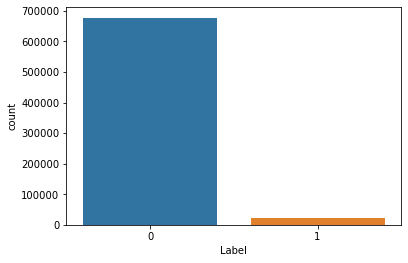

In [13]:
# Data Visualization
print('Visualization of Attack: ')
sns.countplot(x='Label', data=df)
print('Number of records with no anomalies: ', df[df['Label'] == 0].shape[0])
print('Number of records with anomalies: ', df[df['Label'] == 1].shape[0])

Finding records with same source and destination ip

In [11]:
count = 0
for i in df.values:
    if i[0] == i[2]:
        count += 1
print('Records with same source and destination IP: ',count)
print('Percentage of records with same source and destination IP: ',(count/df.shape[0])*100,' %')
print('Total number of records: ',df.shape[0])

Records with same source and destination IP:  1858
Percentage of records with same source and destination IP:  0.2654281922454396  %
Total number of records:  700001


# **Feature Engineering**

Data And Target Separation

In [20]:
data = df.drop('Label', axis = 1) #axis = 1 - column, axis = 0 - rows
target = df.Label
print('Data Shape: ', data.shape)
print('Target Shape: ', target.shape)

Data Shape:  (700001, 48)
Target Shape:  (700001,)


Remove unnecessary attributes

In [21]:
todrop = ['srcip','sport','dstip','dsport','sloss','dloss','Sintpkt','Dintpkt','Stime','Ltime','is_sm_ips_ports','attack_cat']
data.drop(todrop,axis = 1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700001 entries, 0 to 700000
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   proto             700001 non-null  object 
 1   state             700001 non-null  object 
 2   dur               700001 non-null  float64
 3   sbytes            700001 non-null  int64  
 4   dbytes            700001 non-null  int64  
 5   sttl              700001 non-null  int64  
 6   dttl              700001 non-null  int64  
 7   service           700001 non-null  object 
 8   Sload             700001 non-null  float64
 9   Dload             700001 non-null  float64
 10  Spkts             700001 non-null  int64  
 11  Dpkts             700001 non-null  int64  
 12  swin              700001 non-null  int64  
 13  dwin              700001 non-null  int64  
 14  stcpb             700001 non-null  int64  
 15  dtcpb             700001 non-null  int64  
 16  smeansz           70

2. Label Encoding

In [22]:
labelencoder = LabelEncoder()

data.proto  = labelencoder.fit_transform(data.proto )
data.state = labelencoder.fit_transform(data.state)
data.service  = labelencoder.fit_transform(data.service)


data

,proto,state,dur,sbytes,dbytes,sttl,dttl,service,Sload,Dload,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,120,2,0.001055,132,164,31,29,2,5.004739e+05,6.218009e+05,...,0,0,0,3,7,1,3,1,1,1
1,120,2,0.036133,528,304,31,29,0,8.767609e+04,5.048017e+04,...,0,0,0,2,4,2,3,1,1,2
2,120,2,0.001119,146,178,31,29,2,5.218945e+05,6.362824e+05,...,0,0,0,12,8,1,2,2,1,1
3,120,2,0.001209,132,164,31,29,2,4.367246e+05,5.425972e+05,...,0,0,0,6,9,1,1,1,1,1
4,120,2,0.001169,146,178,31,29,2,4.995722e+05,6.090676e+05,...,0,0,0,7,9,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699996,114,5,0.020383,320,1874,31,29,0,1.047932e+05,6.436736e+05,...,0,0,0,8,20,7,5,1,1,4
699997,114,5,1.402957,19410,1087890,31,29,5,1.103783e+05,6.195098e+06,...,4,0,0,1,1,2,7,2,2,2
699998,114,5,0.007108,2158,2464,31,29,0,2.328644e+06,2.658413e+06,...,0,0,0,13,13,6,7,2,1,2
699999,120,2,0.004435,568,304,31,29,0,7.684329e+05,4.112740e+05,...,0,0,0,10,13,6,5,1,1,3


Handling data imbalance using smote

In [9]:
sampler = SMOTE(random_state = 42)
data, target = sampler.fit_resample(data,target.values.ravel())


In [ ]:
target1 = pd.DataFrame({'Attack':target})
sns.countplot(data = target1)
plt.show()

Train Test Split of dataset

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(data,target,test_size=0.2,random_state=10)
X_train

,proto,state,dur,sbytes,dbytes,sttl,dttl,service,Sload,Dload,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
298810,120,2,0.001042,146,178,31,29,2,5.604606e+05,6.833013e+05,...,0,0,0,6,2,3,7,4,1,1
51582,120,2,0.001040,130,162,31,29,2,5.000000e+05,6.230769e+05,...,0,0,0,2,2,2,3,1,1,1
552717,114,5,1.810871,7816,15130,31,29,0,3.424650e+04,6.631063e+04,...,0,0,0,4,8,5,9,1,1,2
423102,114,5,0.016677,2958,32586,31,29,0,1.389698e+06,1.531930e+07,...,0,0,0,11,7,7,24,4,4,7
579114,114,5,0.004710,3848,2456,31,29,0,6.174098e+06,3.940552e+06,...,0,0,0,6,10,4,4,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533660,120,2,0.001024,146,178,31,29,2,5.703125e+05,6.953125e+05,...,0,0,0,3,1,2,2,2,1,1
105595,114,5,8.978476,19722,1087890,31,29,5,1.752547e+04,9.680325e+05,...,0,0,0,5,2,4,5,3,1,2
617841,120,2,0.366325,568,312,31,29,0,9.303215e+03,5.110216e+03,...,0,0,0,10,15,4,4,1,1,3
443712,120,2,0.010297,536,304,31,29,0,3.123240e+05,1.771390e+05,...,0,0,0,13,14,12,13,2,2,7


# **ML Training Models**

In [17]:
!pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
  Using cached lightgbm-4.1.0-py3-none-win_amd64.whl (1.3 MB)
  Using cached xgboost-2.0.2-py3-none-win_amd64.whl (99.8 MB)


In [24]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)
print(models)

 97%|█████████▋| 28/29 [46:11<01:49, 109.43s/it]  

[LightGBM] [Info] Number of positive: 17845, number of negative: 542155
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4632
[LightGBM] [Info] Number of data points in the train set: 560000, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.031866 -> initscore=-3.413829
[LightGBM] [Info] Start training from score -3.413829


100%|██████████| 29/29 [46:16<00:00, 95.75s/it] 


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 97%|█████████▋| 28/29 [44:21<01:56, 116.74s/it]  

[LightGBM] [Info] Number of positive: 17845, number of negative: 542155
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4632
[LightGBM] [Info] Number of data points in the train set: 560000, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.031866 -> initscore=-3.413829
[LightGBM] [Info] Start training from score -3.413829


100%|██████████| 29/29 [44:26<00:00, 91.95s/it] 

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.99               0.99     0.99      0.99   
QuadraticDiscriminantAnalysis      0.98               0.99     0.99      0.99   
BernoulliNB                        0.99               0.99     0.99      0.99   
GaussianNB                         0.98               0.99     0.99      0.98   
RandomForestClassifier             1.00               0.99     0.99      1.00   
LinearDiscriminantAnalysis         0.99               0.99     0.99      0.99   
SVC                                1.00               0.98     0.98      1.00   
LGBMClassifier                     1.00               0.98     0.98      1.00   
ExtraTreesClassifier               1.00               0.98     0.98      1.00   
XGBClassifier                      1.00               0.98     0.98      1.00   
BaggingClassifier           

**K-fold Cross Validation**

In [ ]:
#Choosing k value for cross validation using Decision Tree
kcrossval = []
kcrossvalAcc = []
for i in range(1,10):
  y = target
  train = cross_validate(estimator=DecisionTreeClassifier(),X=data,y=y,n_jobs=-1,cv=i+1,return_train_score = True)
  test = cross_val_predict(estimator=DecisionTreeClassifier(),X=data,y=y,n_jobs=-1,cv=i+1)
  kcrossvalAcc.append(f1_score(y,test))
  kcrossval.append(i+1)
plt.scatter(x=kcrossval, y=kcrossvalAcc)
bestkcv = kcrossvalAcc.index(max(kcrossvalAcc)) + 1
print('Best K value: ',bestkcv)

In [11]:
y=target
bestkcv = 10
def cross_val(model,x,cv = bestkcv):
    print('----------------- After cross validation -----------------')
    global y
    cv_res = cross_validate(estimator=model,X=x,y=y,n_jobs=-1,cv=cv,scoring = 'accuracy',return_train_score = True)
    y_pred = cross_val_predict(estimator=model,X=x,y=y,n_jobs=-1,cv=cv)
    print('Training Score:',cv_res['train_score'].mean())
    print('Testing Score:',accuracy_score(y,y_pred))
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y,y_pred),annot=True,cmap='GnBu',fmt = 'd')
    plt.title('The Confusion Matrix',color='black')
    plt.xlabel('Predicted',color='black')
    plt.ylabel('Actual',color='black')
    plt.show()
    print(classification_report(y,y_pred))

1. K-Nearest Neighbours

In [ ]:
knnres = []
acc = []
for i in range(20):
  KNN = KNeighborsClassifier(n_neighbors = i+1)

  KNN.fit(X_train, Y_train)
  knn_ytrain_pred = KNN.predict(X_train)
  knn_ytest_pred = KNN.predict(X_test)
  knnres.append(i+1)
  acc.append(f1_score(Y_test, knn_ytest_pred)*100)

plt.scatter(x=knnres, y=acc)
bestk = acc.index(max(acc)) + 1
print('Best K value: ',acc.index(max(acc)) + 1)

In [12]:
bestk = 5
KNN = KNeighborsClassifier(n_neighbors = bestk)

KNN.fit(X_train, Y_train)
knn_ytrain_pred = KNN.predict(X_train)
knn_ytest_pred = KNN.predict(X_test)
knn_ytest_pred = KNN.predict(X_test)

print('Training Score:',accuracy_score(Y_train,knn_ytrain_pred))
print('Testing Score:',accuracy_score(Y_test,knn_ytest_pred))

cross_val(KNeighborsClassifier(n_neighbors = bestk),data)

KeyboardInterrupt: 

2. Logistic Regression

Without imbalance handling

Training Score: 0.963
Testing Score: 0.9636645452532482
----------------- After cross validation -----------------
Training Score: 0.9650078274919845
Testing Score: 0.9552357782346025


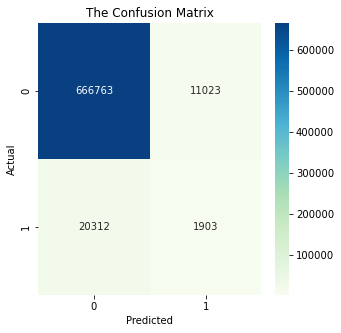

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    677786
           1       0.15      0.09      0.11     22215

    accuracy                           0.96    700001
   macro avg       0.56      0.53      0.54    700001
weighted avg       0.94      0.96      0.95    700001



In [16]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

lr_ytrain_pred = log_reg.predict(X_train)
lr_ytest_pred = log_reg.predict(X_test)

print('Training Score:',accuracy_score(Y_train,lr_ytrain_pred))
print('Testing Score:',accuracy_score(Y_test,lr_ytest_pred))

cross_val(LogisticRegression(),data)

With Imbalance Handling

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score: 0.8617769077058841
Testing Score: 0.8628183612120318
----------------- After cross validation -----------------
Training Score: 0.8619454456265958
Testing Score: 0.8620582307690038


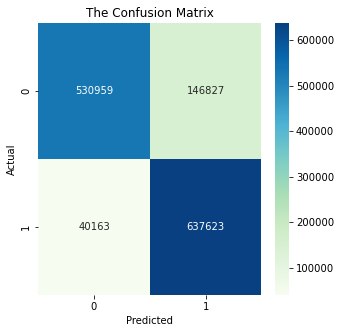

              precision    recall  f1-score   support

           0       0.93      0.78      0.85    677786
           1       0.81      0.94      0.87    677786

    accuracy                           0.86   1355572
   macro avg       0.87      0.86      0.86   1355572
weighted avg       0.87      0.86      0.86   1355572



In [116]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

lr_ytrain_pred = log_reg.predict(X_train)
lr_ytest_pred = log_reg.predict(X_test)

print('Training Score:',accuracy_score(Y_train,lr_ytrain_pred))
print('Testing Score:',accuracy_score(Y_test,lr_ytest_pred))

cross_val(LogisticRegression(),data)

3. Random Forest

In [ ]:
rfres = []
rfacc = []
for i in range(100):
  rfc = RandomForestClassifier(n_estimators = i+1)

  rfc.fit(X_train, Y_train)
  rfc_ytrain_pred = rfc.predict(X_train)
  rfc_ytest_pred = rfc.predict(X_test)
  rfres.append(i+1)
  rfacc.append(f1_score(Y_test, rfc_ytest_pred)*100)

plt.scatter(x=rfres, y=rfacc)
bestn = rfacc.index(max(rfacc)) + 1
print('Best n value: ',rfacc.index(max(rfacc)) + 1)

In [ ]:
rf = RandomForestClassifier(max_depth=5,n_estimators = 61, random_state=0)
rf.fit(X_train,Y_train)

rf_ytrain_pred = rf.predict(X_train)
rf_ytest_pred = rf.predict(X_test)

print('Training Score:',accuracy_score(Y_train,rf_ytrain_pred))
print('Testing Score:',accuracy_score(Y_test,rf_ytest_pred))

cross_val(RandomForestClassifier(max_depth=2, random_state=0),data)

4. Decision Tree

Training Score: 0.9999392857142857
Testing Score: 0.9967643088263656
----------------- After cross validation -----------------
Training Score: 0.9999056568867098
Testing Score: 0.996706187498709


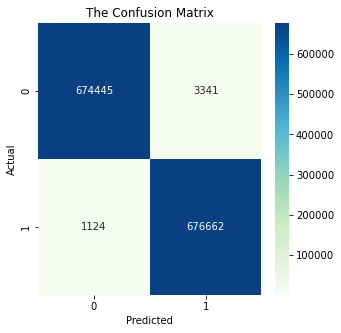

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    677786
           1       1.00      1.00      1.00    677786

    accuracy                           1.00   1355572
   macro avg       1.00      1.00      1.00   1355572
weighted avg       1.00      1.00      1.00   1355572



In [41]:
from sklearn.tree import plot_tree
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train,Y_train) #fitting the preprocessed data with the decision tree algorithm

dt_ytrain_pred = DecisionTree.predict(X_train)
dt_ytest_pred = DecisionTree.predict(X_test)

print('Training Score:',accuracy_score(Y_train,dt_ytrain_pred))
print('Testing Score:',accuracy_score(Y_test,dt_ytest_pred))

cross_val(DecisionTreeClassifier(),data)

[Text(0.6301409590281297, 0.9871794871794872, 'sttl <= 61.0\ngini = 0.062\nsamples = 560000\nvalue = [542155, 17845]\nclass = 0'),
 Text(0.41887500913459685, 0.9615384615384616, 'ct_state_ttl <= 1.0\ngini = 0.0\nsamples = 537846\nvalue = [537817, 29]\nclass = 0'),
 Text(0.4179198992969655, 0.9358974358974359, 'gini = 0.0\nsamples = 536419\nvalue = [536419, 0]\nclass = 0'),
 Text(0.41983011897222816, 0.9358974358974359, 'proto <= 39.0\ngini = 0.04\nsamples = 1427\nvalue = [1398, 29]\nclass = 0'),
 Text(0.41887500913459685, 0.9102564102564102, 'gini = 0.0\nsamples = 1398\nvalue = [1398, 0]\nclass = 0'),
 Text(0.42078522880985947, 0.9102564102564102, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]\nclass = 1'),
 Text(0.8414069089216626, 0.9615384615384616, 'ct_state_ttl <= 2.5\ngini = 0.315\nsamples = 22154\nvalue = [4338, 17816]\nclass = 1'),
 Text(0.6930812485978619, 0.9358974358974359, 'service <= 0.5\ngini = 0.264\nsamples = 20885\nvalue = [3272, 17613]\nclass = 1'),
 Text(0.42269544848512

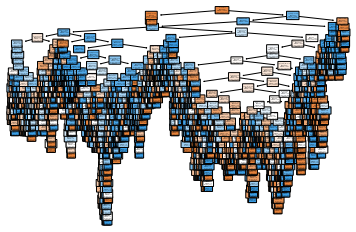

In [42]:
plot_tree(DecisionTree,filled=True,rounded=True,feature_names=data.columns,class_names=['0','1'])

In [9]:
DecisionTree1 = DecisionTreeClassifier(max_depth=5)
DecisionTree1.fit(X_train,Y_train) #fitting the preprocessed data with the decision tree algorithm

dt_ytrain_pred = DecisionTree1.predict(X_train)
dt_ytest_pred = DecisionTree1.predict(X_test)

print('Training Score:',accuracy_score(Y_train,dt_ytrain_pred))
print('Testing Score:',accuracy_score(Y_test,dt_ytest_pred))

Training Score: 0.9970538250940333
Testing Score: 0.9972779078988621


[Text(0.355, 0.9166666666666666, 'sttl <= 61.0\ngini = 0.5\nsamples = 1084457\nvalue = [542393, 542064]\nclass = 0'),
 Text(0.08, 0.75, 'ct_state_ttl <= 0.5\ngini = 0.004\nsamples = 539058\nvalue = [538023, 1035]\nclass = 0'),
 Text(0.04, 0.5833333333333334, 'gini = 0.0\nsamples = 536625\nvalue = [536625, 0]\nclass = 0'),
 Text(0.12, 0.5833333333333334, 'ct_srv_src <= 6.0\ngini = 0.489\nsamples = 2433\nvalue = [1398, 1035]\nclass = 0'),
 Text(0.08, 0.4166666666666667, 'gini = 0.0\nsamples = 1398\nvalue = [1398, 0]\nclass = 0'),
 Text(0.16, 0.4166666666666667, 'gini = 0.0\nsamples = 1035\nvalue = [0, 1035]\nclass = 1'),
 Text(0.63, 0.75, 'smeansz <= 45.5\ngini = 0.016\nsamples = 545399\nvalue = [4370, 541029]\nclass = 1'),
 Text(0.38, 0.5833333333333334, 'ct_state_ttl <= 2.5\ngini = 0.334\nsamples = 4932\nvalue = [1047, 3885]\nclass = 1'),
 Text(0.24, 0.4166666666666667, 'ct_state_ttl <= 0.5\ngini = 0.166\nsamples = 4019\nvalue = [366, 3653]\nclass = 1'),
 Text(0.2, 0.25, 'gini = 0.0\ns

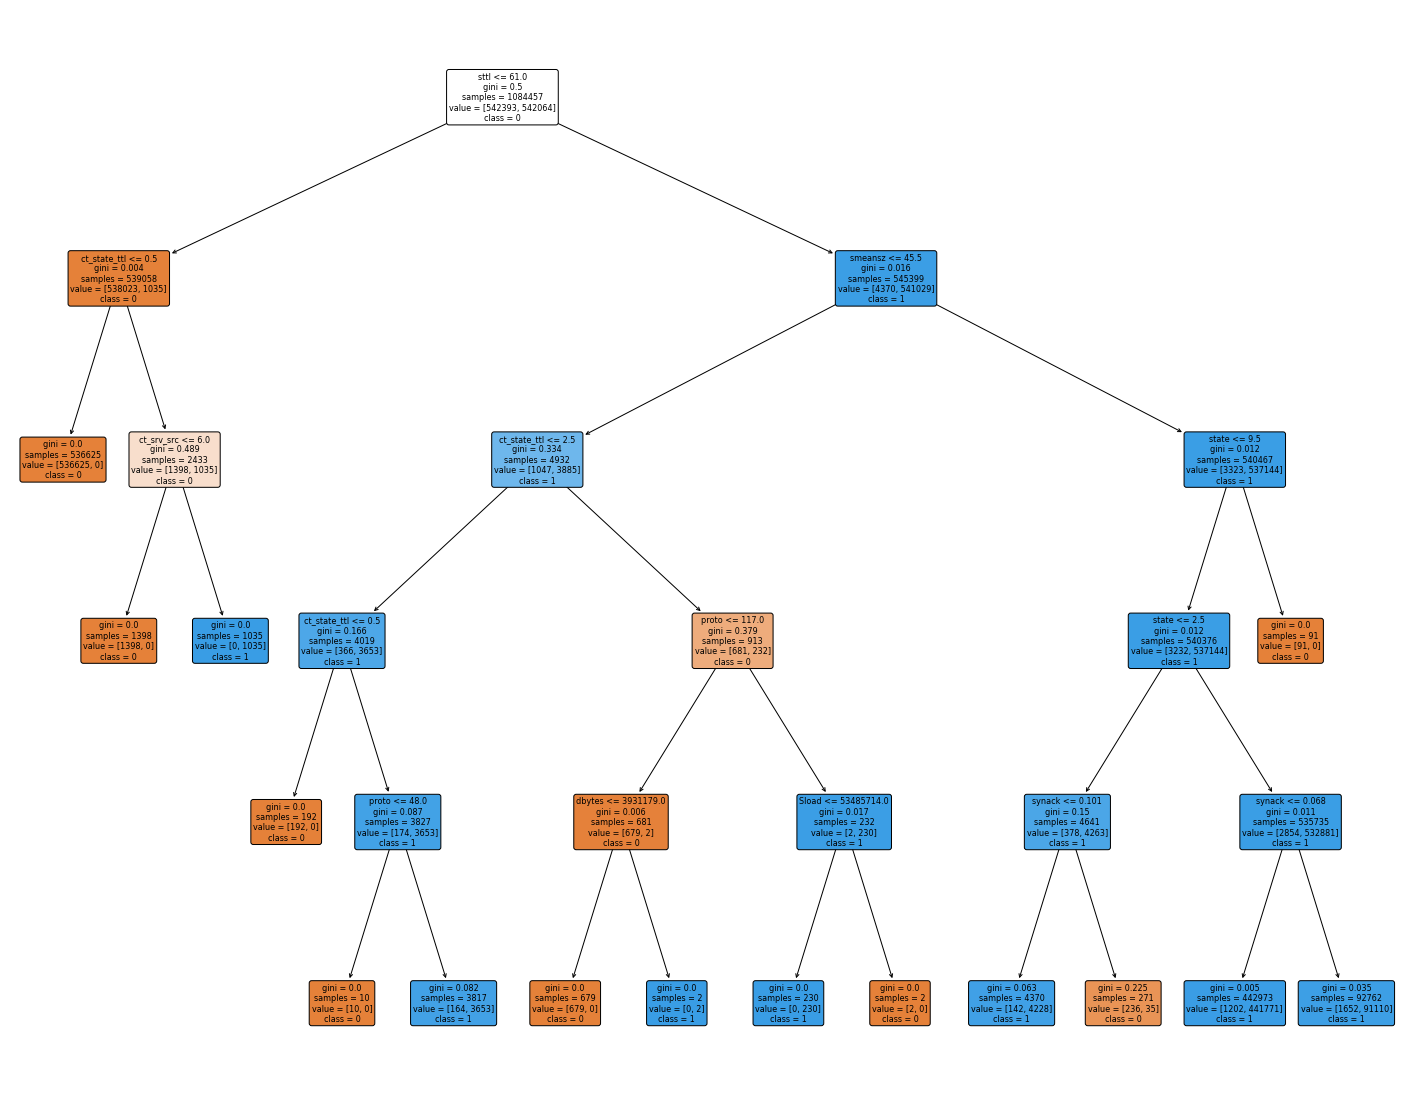

In [11]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
plot_tree(DecisionTree1,filled=True,rounded=True,feature_names=data.columns,class_names=['0','1'])

5. Gaussian Naive Bayes'

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

gnb_ytrain_pred = gnb.predict(X_train)
gnb_ytest_pred = gnb.predict(X_test)

print('Training Score:',accuracy_score(Y_train,gnb_ytrain_pred))
print('Testing Score:',accuracy_score(Y_test,gnb_ytest_pred))

cross_val(GaussianNB(),data)

7. Support Vector Machines(SVM)

In [ ]:
SVM = SVC()
SVM.fit(X_train, Y_train)

svm_ytrain_pred = SVM.predict(X_train)
svm_ytest_pred = SVM.predict(X_test)

print('Training Score:',accuracy_score(Y_train,svm_ytrain_pred))
print('Testing Score:',accuracy_score(Y_test,svm_ytest_pred))

cross_val(SVC(),data)

# **Dimensionality Reduction**

1. Principal Component Analysis(PCA):

In [70]:
len(data.columns)

36


Best n value:  3
Variance Ratio: [7.93374162e-01 2.06034367e-01 5.86866955e-04]

Second Best n value:  3
Variance Ratio: [7.93374162e-01 2.06034367e-01 5.86866955e-04]


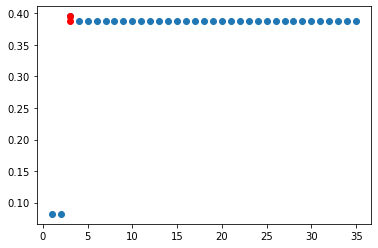

In [72]:
from sklearn.decomposition import PCA
pca_n = []
pca_n_f1 = []
pca_attr = []
for i in range(1,36):
  pca = PCA(n_components = i)
  pca_x_train = pca.fit_transform(X_train)
  pca_x_test = pca.fit_transform(X_test)
  pca_attr.append(pca.explained_variance_ratio_)
  # # explained_variance = pca.explained_variance_ratio_
  # print(explained_variance)
  classifier = LogisticRegression()
  classifier.fit(pca_x_train, Y_train)
  classifier_pred = classifier.predict(pca_x_test)
  pca_n.append(i)
  pca_n_f1.append(f1_score(Y_test,classifier_pred))

plt.scatter(x=pca_n, y=pca_n_f1)

best_pca_n = pca_n_f1.index(max(pca_n_f1)) + 1
print('\nBest n value: ',best_pca_n)
print('Variance Ratio:',pca_attr[best_pca_n - 1])
plt.scatter(x=best_pca_n, y=pca_n_f1[best_pca_n - 1], color='red')
pca_n_f1.pop(best_pca_n -1)
sbest_pca_n = pca_n_f1.index(max(pca_n_f1)) + 1
print('\nSecond Best n value: ',sbest_pca_n)
print('Variance Ratio:',pca_attr[sbest_pca_n - 1])
plt.scatter(x=sbest_pca_n, y=pca_n_f1[sbest_pca_n - 1], color='red')
plt.show()

In [73]:
pca.components_

array([[-5.54676039e-10,  4.78132721e-10,  2.05695037e-11, ...,
         2.16930198e-12,  1.17451637e-11,  2.29113611e-11],
       [-2.25356214e-12,  1.87880969e-12,  7.87705643e-12, ...,
         4.69624446e-12,  4.76867329e-12, -1.48883181e-12],
       [ 6.90656254e-10,  5.59555147e-09, -1.90553746e-09, ...,
         3.89327666e-09,  2.13904592e-09,  3.24306553e-09],
       ...,
       [ 1.23607593e-04,  2.76444391e-04,  6.99520521e-06, ...,
        -7.40553702e-04, -2.36257976e-03,  3.69366634e-04],
       [ 1.23183668e-04,  4.53712759e-03, -9.86807787e-06, ...,
        -2.21840849e-04, -1.78510928e-04,  1.60980880e-04],
       [-1.58158642e-05, -4.46358464e-05,  2.04734462e-07, ...,
         1.41325750e-04, -1.39246214e-04, -4.02741794e-05]])

----------------- After cross validation -----------------
Training Score: 0.7566690177656216
Testing Score: 0.7566665584712579


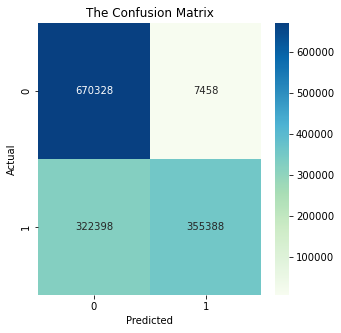

              precision    recall  f1-score   support

           0       0.68      0.99      0.80    677786
           1       0.98      0.52      0.68    677786

    accuracy                           0.76   1355572
   macro avg       0.83      0.76      0.74   1355572
weighted avg       0.83      0.76      0.74   1355572



In [26]:
from sklearn.decomposition import PCA
sbest_pca_n=3
pca = PCA(n_components=sbest_pca_n)

pca_data = pca.fit_transform(data)
pca_x_train = pca.fit_transform(X_train)

classifier = LogisticRegression()
classifier.fit(pca_x_train, Y_train)
cross_val(LogisticRegression() , pca_data)

PCA forms 3 linear equations, which each attribute having some coefficient. This coefficient determines how important a variable is for the final prediction

In [33]:
print('AttributeName   PCA1   PCA2   PCA3')
attributeweights = {}
attributeimportance = {}
pcasum = [sum(abs(pca.components_[0])),sum(abs(pca.components_[1])),sum(abs(pca.components_[2]))]
for i in range(len(data.columns)):
    attributeweights[data.columns[i]] = [pca.components_[0][i],pca.components_[1][i],pca.components_[2][i]]
    attributeimportance[data.columns[i]] = abs(pca.components_[0][i])/pcasum[0]+abs(pca.components_[1][i])/pcasum[1]+abs(pca.components_[2][i])/pcasum[2]
    print(data.columns[i],'\t',pca.components_[0][i],'\t',pca.components_[1][i],'\t',pca.components_[2][i])

AttributeName   PCA1   PCA2   PCA3
proto 	 -5.31165442603976e-10 	 -1.2029385772281977e-12 	 2.9788406728399397e-10
state 	 4.756067170828796e-10 	 1.7806200453017851e-12 	 5.238499404980788e-09
dur 	 1.2830549327506897e-11 	 -2.3361675334946367e-12 	 -1.8713884454113884e-09
sbytes 	 1.2931459424734713e-06 	 -7.74484868587323e-09 	 -1.1611788410873115e-06
dbytes 	 1.3150233671933963e-05 	 -2.317791879856502e-07 	 -5.310117252270749e-05
sttl 	 -2.118618325900837e-09 	 9.259538696130696e-11 	 2.432836502168553e-07
dttl 	 1.8757171215440586e-09 	 1.291265946262289e-10 	 -5.425632067858871e-08
service 	 1.0583081240441339e-10 	 -8.955107009452748e-13 	 -1.3094136566966652e-10
Sload 	 -0.0032766373053334874 	 8.615701178972812e-05 	 0.9999909236057848
Dload 	 0.0006803955076612198 	 -1.093787178014228e-05 	 -0.0027191926920468487
Spkts 	 1.0786255591931968e-08 	 -2.506876299796993e-10 	 -3.58987375787441e-08
Dpkts 	 1.4608195692077992e-08 	 -3.214953025911146e-10 	 -5.611339418948043e-08
sw

In [34]:
attributesorted = sorted(attributeimportance.items(), key=lambda x: x[1], reverse = True)
print(attributesorted)

[('dtcpb', 1.0009266407933521), ('stcpb', 1.0008046995624005), ('Sload', 0.9950058148975898), ('Dload', 0.0031866895483905915), ('dbytes', 6.214703165584852e-05), ('res_bdy_len', 6.57606773527362e-06), ('Sjit', 2.438287037492203e-06), ('sbytes', 2.069948118722063e-06), ('Djit', 1.3510162839776236e-06), ('dmeansz', 4.52369300408227e-07), ('smeansz', 3.4484032151426336e-07), ('sttl', 2.4305329332243546e-07), ('dwin', 1.7126351949911564e-07), ('swin', 1.6233410233194904e-07), ('Dpkts', 6.622858046408818e-08), ('dttl', 5.5271105164285735e-08), ('Spkts', 4.3417605681715974e-08), ('ct_srv_src', 7.2228368832346484e-09), ('ct_srv_dst', 6.777539619209631e-09), ('state', 5.536585513515343e-09), ('ct_src_dport_ltm', 3.6656211208798224e-09), ('ct_dst_src_ltm', 3.0382145606960274e-09), ('ct_state_ttl', 2.0436522590657026e-09), ('ct_dst_sport_ltm', 2.013508527962432e-09), ('dur', 1.8683204939807574e-09), ('proto', 6.710836947800821e-10), ('ct_src_ ltm', 3.1540416745963666e-10), ('ct_dst_ltm', 2.9966

2. Singular Value Decomposition(SVD):


Best n value:  4


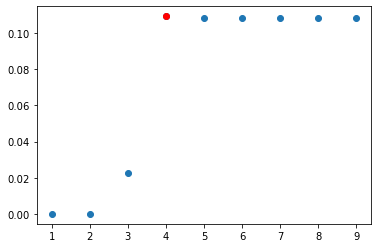

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

svd_n = []
svd_n_f1 = []
for i in range(1,10):
  steps = [('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression())]
  pipeline_model = Pipeline(steps=steps)
  cv_res = cross_validate(estimator=pipeline_model,X=data,y=target,n_jobs=-1,cv=10,scoring = 'accuracy',return_train_score = True)
  y_pred = cross_val_predict(estimator=pipeline_model,X=data,y=target,n_jobs=-1,cv=10)
  svd_n_f1.append(f1_score(target,y_pred))
  svd_n.append(i)

plt.scatter(x=svd_n, y=svd_n_f1)

best_svd_n = svd_n_f1.index(max(svd_n_f1)) + 1
print('\nBest n value: ',best_svd_n)
plt.scatter(x=best_svd_n, y=svd_n_f1[best_svd_n - 1], color='red')
plt.show()

----------------- After cross validation -----------------
Training Score: 0.9810449841785409
Testing Score: 0.9719255045102732


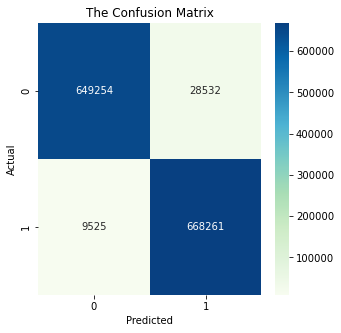

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    677786
           1       0.96      0.99      0.97    677786

    accuracy                           0.97   1355572
   macro avg       0.97      0.97      0.97   1355572
weighted avg       0.97      0.97      0.97   1355572



In [118]:
steps = [('svd', TruncatedSVD(n_components=4)), ('m', KNeighborsClassifier())]
svd_model = Pipeline(steps=steps)
cross_val(svd_model,data)

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=4)
svd.fit(data)


TruncatedSVD(n_components=4)

In [100]:
# Select the features that have the highest singular values
df_reduced = svd.transform(data)
svd.feature_names_in_
svd.singular_values_
svd.components_
svd.explained_variance_
svd.explained_variance_ratio_
svd.algorithm
svd.n_components
#df_reduced.get_feature_names_out(data.columns)
# features = df_reduced.columns[svd.singular_values_].sort_values(ascending=False)
svd.components_
# # Print the selected features
# print(features)
#df_reduced.columns

array([[ 3.11967331e-08,  1.35797160e-09,  2.42220254e-10,
         1.90971535e-06,  1.86548250e-05,  9.66373437e-09,
         9.51733735e-09,  4.72104553e-10,  3.13480177e-04,
         1.10653045e-03,  1.58803260e-08,  2.11729050e-08,
         6.97803681e-08,  6.97408742e-08,  7.06670854e-01,
         7.07541504e-01,  3.94264322e-08,  1.24865133e-07,
         3.64468198e-11,  1.84251587e-06,  6.69445701e-07,
         3.62433368e-07,  1.32153420e-12,  7.32827367e-13,
         5.88706833e-13,  8.34037119e-12,  6.37961502e-11,
         7.62344919e-12,  1.21779718e-11,  1.82473789e-09,
         1.70388159e-09,  1.17439358e-09,  1.32983227e-09,
         4.62204786e-10,  3.88741615e-10,  6.07575616e-10],
       [ 6.79301933e-11,  3.50630817e-12,  1.89190889e-13,
         8.60921947e-09, -4.38998090e-08,  8.86952387e-11,
         1.24068903e-10,  1.72273509e-12,  8.37782192e-05,
        -7.83790943e-06, -1.33938755e-10, -1.44523885e-10,
         1.41226447e-10,  4.33096011e-11,  7.07541958e-

In [37]:
components = svd.components_
print("Component Matrix:")
print(components)

Component Matrix:
[[ 3.14905112e-08  1.37238264e-09  3.71330716e-10  4.37304746e-06
   1.43598740e-05  2.46301473e-08  3.14080887e-08  4.80706134e-10
   2.08408930e-04  7.17355834e-04  1.39597094e-08  1.66255484e-08
   7.04378283e-08  7.04066710e-08  7.09344241e-01  7.04861823e-01
   4.53865865e-08  9.91685273e-08  2.53570587e-11  1.31037578e-06
   2.45642328e-06  3.85501721e-07  1.33450169e-11  6.63166255e-12
   6.71335435e-12  1.06571970e-10  4.25788728e-11  5.03555170e-12
   7.96232711e-12  1.46209300e-09  1.32061334e-09  8.82189073e-10
   1.01288031e-09  4.08693065e-10  3.55557090e-10  5.06006742e-10]
 [ 2.13317172e-11 -2.13340159e-13  1.07608980e-11 -3.32483652e-07
   1.92225967e-07 -6.61898024e-10 -1.15149977e-09  2.20333817e-13
  -4.42441284e-05  2.66167729e-05  1.27719225e-10  3.09912376e-10
   5.43872060e-11  1.25366658e-10 -7.04862025e-01  7.09344432e-01
   1.53494853e-10  3.65891265e-10  1.46358716e-12  5.56747446e-08
  -1.10799781e-06 -4.68935537e-08 -4.15333689e-13 -1.2936

In [38]:
svdattributes = {}
svdattributeimportance = {}
svdsum = [sum(abs(components[0])),sum(abs(components[1])),sum(abs(components[2])),sum(abs(components[3]))]
for i in range(len(data.columns)):
    svdattributes[data.columns[i]] = [components[0][i],components[1][i],components[2][i],components[3][i]]
    svdattributeimportance[data.columns[i]] = abs(components[0][i])/svdsum[0]+abs(components[1][i])/svdsum[1]+abs(components[2][i])/svdsum[2]+abs(components[3][i])/svdsum[3]
    print(data.columns[i],'\t',components[0][i],'\t',components[1][i],'\t',components[2][i],'\t',components[3][i])

proto 	 3.149051119865237e-08 	 2.1331717175997786e-11 	 1.9733863613506408e-07 	 3.1012167819863384e-06
state 	 1.3723826360909166e-09 	 -2.1334015894721814e-13 	 1.0491784903900908e-08 	 1.1451577610589859e-07
dur 	 3.713307156331017e-10 	 1.0760897968080979e-11 	 7.321509983450606e-13 	 -1.211259915574014e-07
sbytes 	 4.373047455590057e-06 	 -3.3248365165719447e-07 	 1.2437153669246475e-06 	 -0.0011662236237775948
dbytes 	 1.4359873969603333e-05 	 1.9222596725609737e-07 	 -5.559171277911461e-07 	 0.002630729886294053
sttl 	 2.463014730264645e-08 	 -6.618980240932217e-10 	 4.3246883037970957e-07 	 -5.194231535395179e-06
dttl 	 3.1408088732909704e-08 	 -1.1514997656317866e-09 	 -1.0166456749074187e-09 	 -7.828841348143802e-06
service 	 4.807061337934014e-10 	 2.203338172632584e-13 	 1.2567308454625522e-09 	 -1.1782314295714581e-07
Sload 	 0.0002084089302839614 	 -4.4244128414048775e-05 	 0.9999999763492041 	 -4.367092761124237e-05
Dload 	 0.0007173558337597494 	 2.661677293685613e-05 

In [39]:
print("Attribute Importance:")
print(svdattributeimportance)

Attribute Importance:
{'proto': 3.301928957942674e-06, 'state': 1.2527871703857134e-07, 'dur': 1.206614080823226e-07, 'sbytes': 0.0011637123625589851, 'dbytes': 0.002625598360893934, 'sttl': 5.6128927724829e-06, 'dttl': 7.805339369557256e-06, 'service': 1.1870401602253532e-07, 'Sload': 0.9998808130521782, 'Dload': 0.994493736991078, 'Spkts': 1.9816639871397837e-06, 'Dpkts': 2.765158077966253e-06, 'swin': 5.171578353365423e-06, 'dwin': 5.181295839211168e-06, 'stcpb': 1.0003041424154224, 'dtcpb': 1.0002768364236128, 'smeansz': 8.065407189706901e-06, 'dmeansz': 4.223765711005741e-05, 'trans_depth': 7.50725418958775e-09, 'res_bdy_len': 0.00013404472746893968, 'Sjit': 0.0009051000242522446, 'Djit': 0.0001320774221908701, 'tcprtt': 4.826537175128039e-09, 'synack': 2.375461848840062e-09, 'ackdat': 2.4510753262879884e-09, 'ct_state_ttl': 4.2746558608908617e-08, 'ct_flw_http_mthd': 1.3145414040253908e-08, 'is_ftp_login': 1.666501911083703e-09, 'ct_ftp_cmd': 2.6398945197795902e-09, 'ct_srv_src':